# P1 vs. P1 Venn Diagram of DEGs
using results from [deseq_p1.v.p1.ipynb](https://github.com/jgmcdonough/CE24_RNA-seq/blob/main/analysis/diff_expression/phase1_v_phase1/deseq_p1.v.p1.ipynb) to look for DEGs that are shared/unique among the comparisons

## 0. load libraries

In [2]:
library(ggvenn)
library(tidyverse)
library(UpSetR)

## 1. data processing

### 1a. read CSVs

In [3]:
# get list of files
files <- list.files(
    path = '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs',
    pattern = '\\.csv$',
    full.names = TRUE
    )

head(files)

[1] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs/DEG_b_c.csv"
[2] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs/DEG_h_b.csv"
[3] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs/DEG_h_c.csv"
[4] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs/DEG_h_w.csv"
[5] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs/DEG_w_b.csv"
[6] "/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/deseq_res_files/DEGs/DEG_w_c.csv"

In [4]:
names(files) <- gsub("^DEG_", "", tools::file_path_sans_ext(basename(files)))
deg_list <- lapply(files, read.csv)
names(deg_list)

[1] "b_c" "h_b" "h_c" "h_w" "w_b" "w_c"

## 2. venn diagram

#### comparisons against control

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the ggvenn package.
  Please report the issue to the authors.”


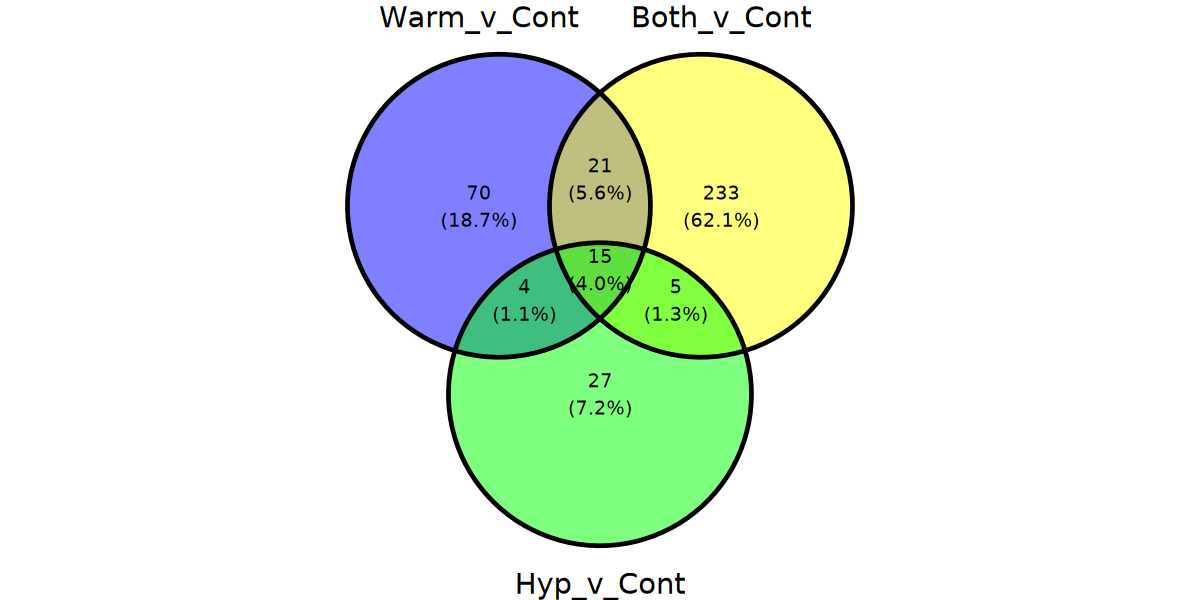

In [29]:
options(repr.plot.width=10, repr.plot.height=5)

# make list of dfs
x = list(Warm_v_Cont = deg_list$w_c$X,
         Both_v_Cont = deg_list$b_c$X,
         Hyp_v_Cont = deg_list$h_c$X)

ggvenn(x)

#### comparisons with warm

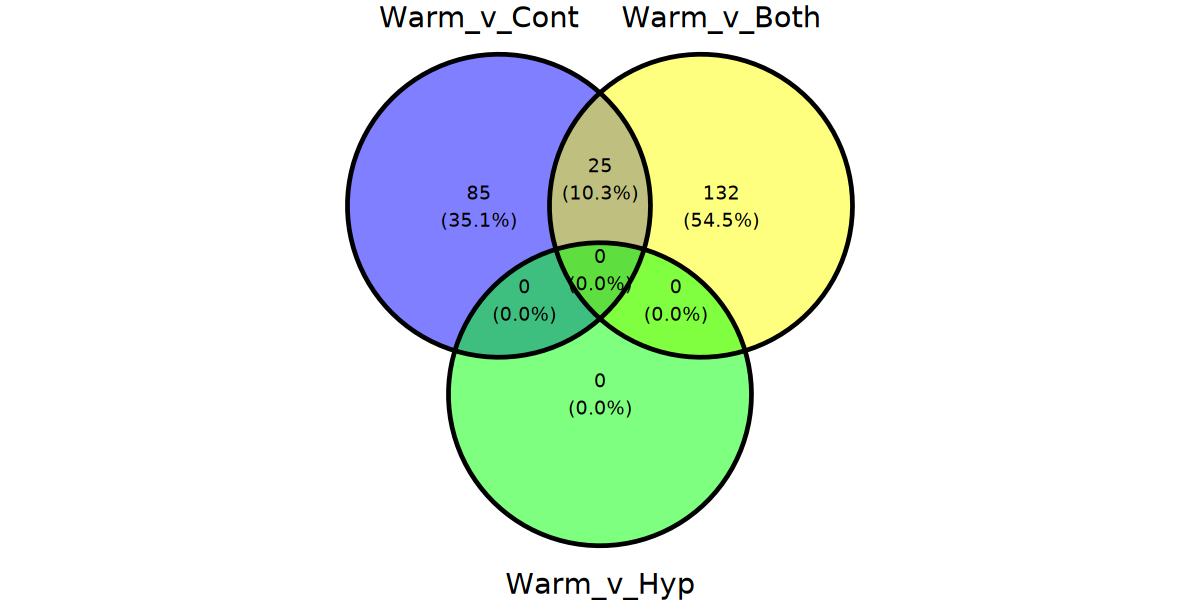

In [30]:
# make list of dfs
y = list(Warm_v_Cont = deg_list$w_c$X,
         Warm_v_Both = deg_list$w_b$X,
         Warm_v_Hyp = deg_list$w_h$X)

ggvenn(y)

#### comparisons with hypoxic

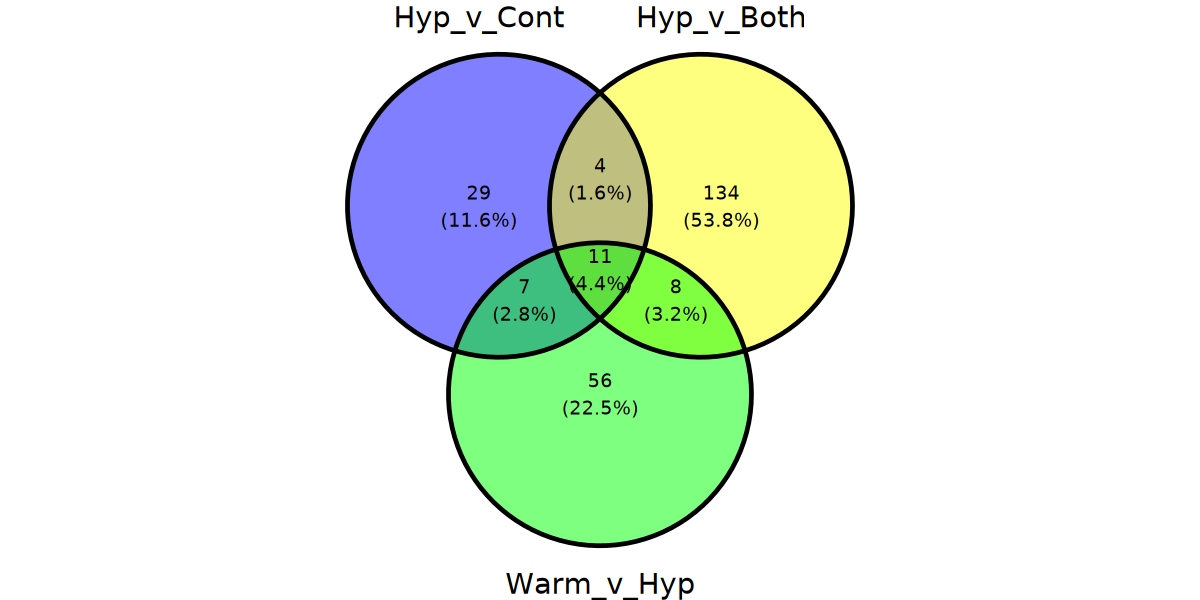

In [32]:
# make list of dfs
z = list(Hyp_v_Cont = deg_list$h_c$X,
         Hyp_v_Both = deg_list$h_b$X,
         Warm_v_Hyp = deg_list$h_w$X)

ggvenn(z)

#### comparisons with both

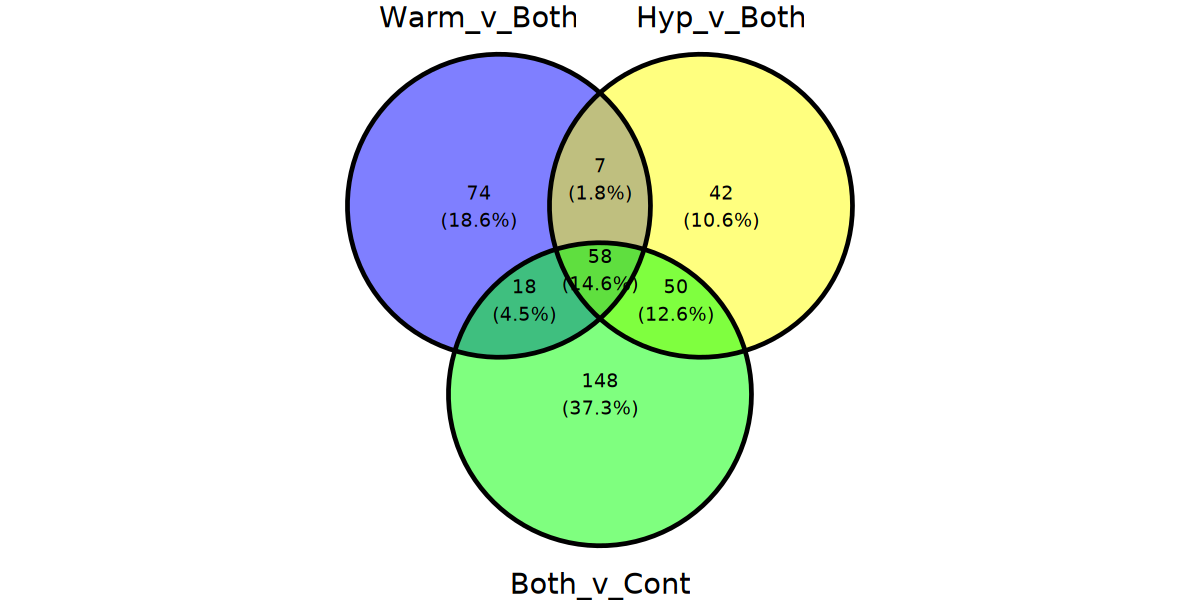

In [33]:
# make list of dfs
w = list(Warm_v_Both = deg_list$w_b$X,
         Hyp_v_Both = deg_list$h_b$X,
         Both_v_Cont = deg_list$b_c$X)

ggvenn(w)

## Upset Plot
similar to venn diagram, but different type of visual

using [`UpSetR`](https://github.com/hms-dbmi/UpSetR)

In [41]:
# make list of dfs
u_list = list(Warm_v_Cont = deg_list$w_c$X,
         Both_v_Cont = deg_list$b_c$X,
         Hyp_v_Cont = deg_list$h_c$X,
        Hyp_v_Both = deg_list$h_b$X,
        Warm_v_Both = deg_list$w_b$X,
        Hyp_v_Warm = deg_list$h_w$X)

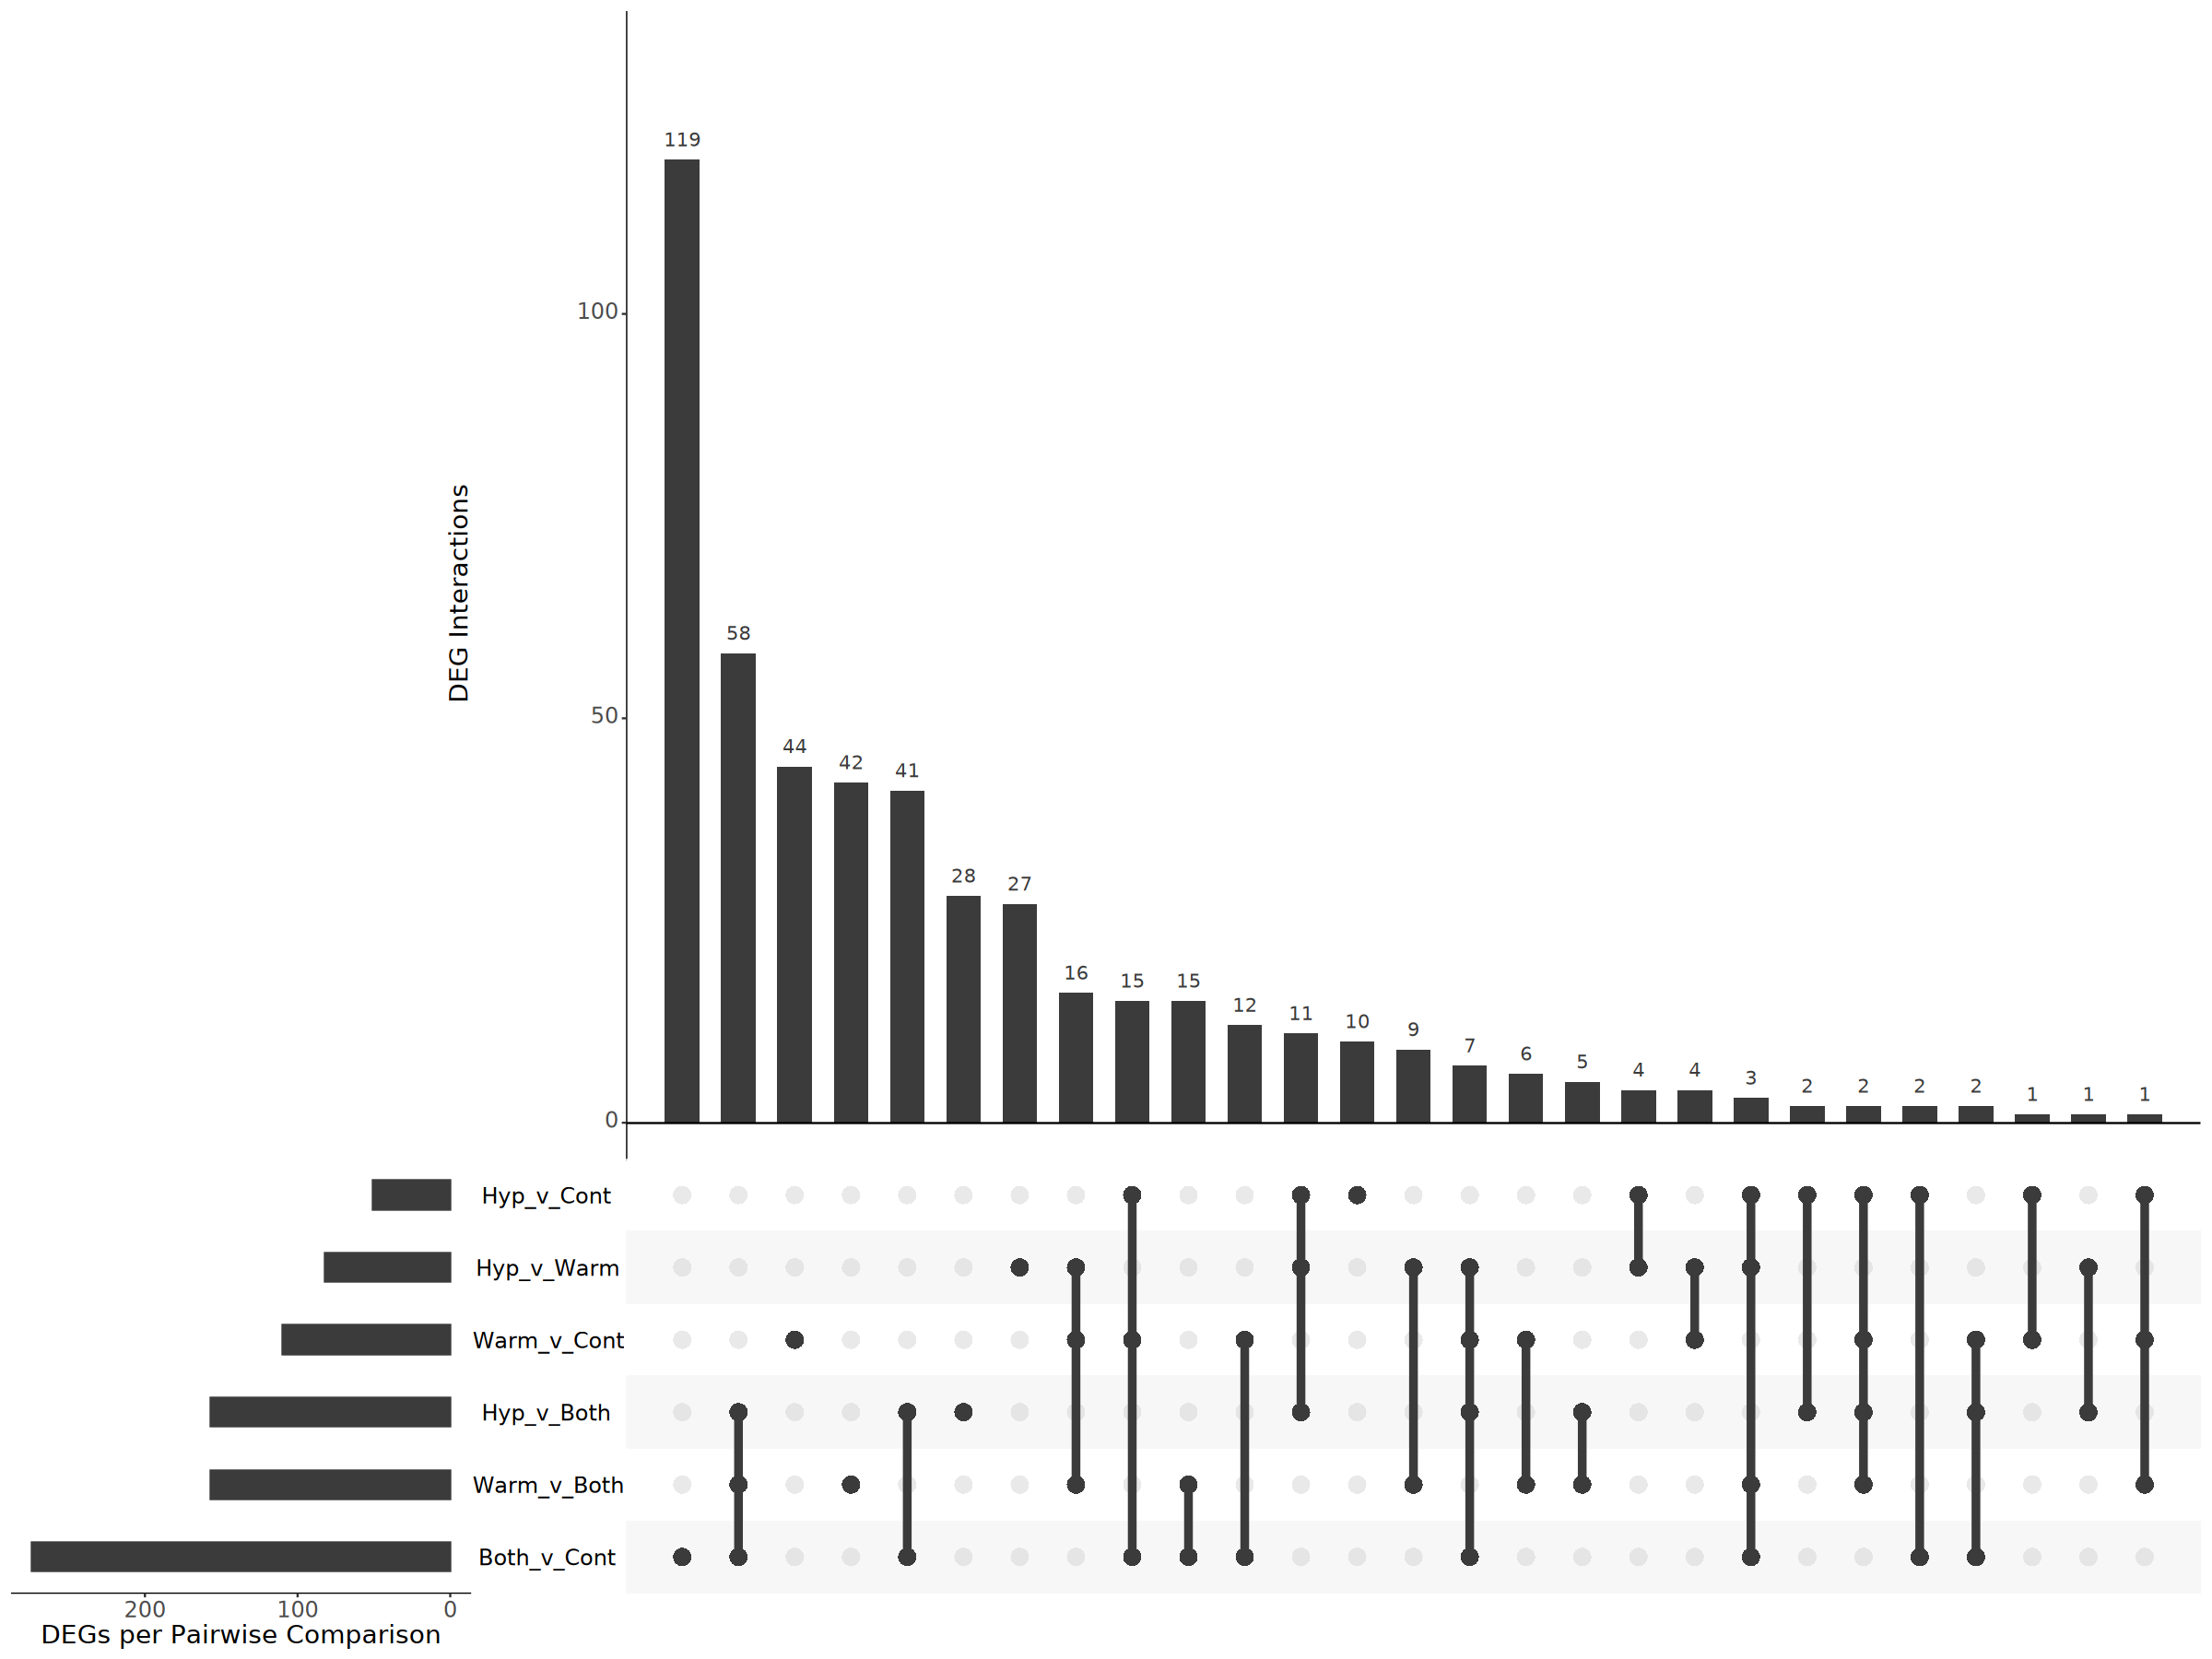

In [42]:
options(repr.plot.width=20, repr.plot.height=15)

all.comp.upset <- upset(fromList(u_list), nsets = 6,, order.by='freq', point.size = 5, line.size = 2, 
    mainbar.y.label = "DEG Interactions", sets.x.label = "DEGs per Pairwise Comparison", 
    text.scale = c(2, 2, 2, 2, 2, 2))

all.comp.upset

In [43]:
pdf('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/plots/all.comparisons_upset.pdf', width=20, height=10)
all.comp.upset
dev.off()

png 
  2

The above plot is every comparison I have, which can be helpful to look at the data all at once, but overwhelming too - splitting this up below to look at just **comparisons with control** ...

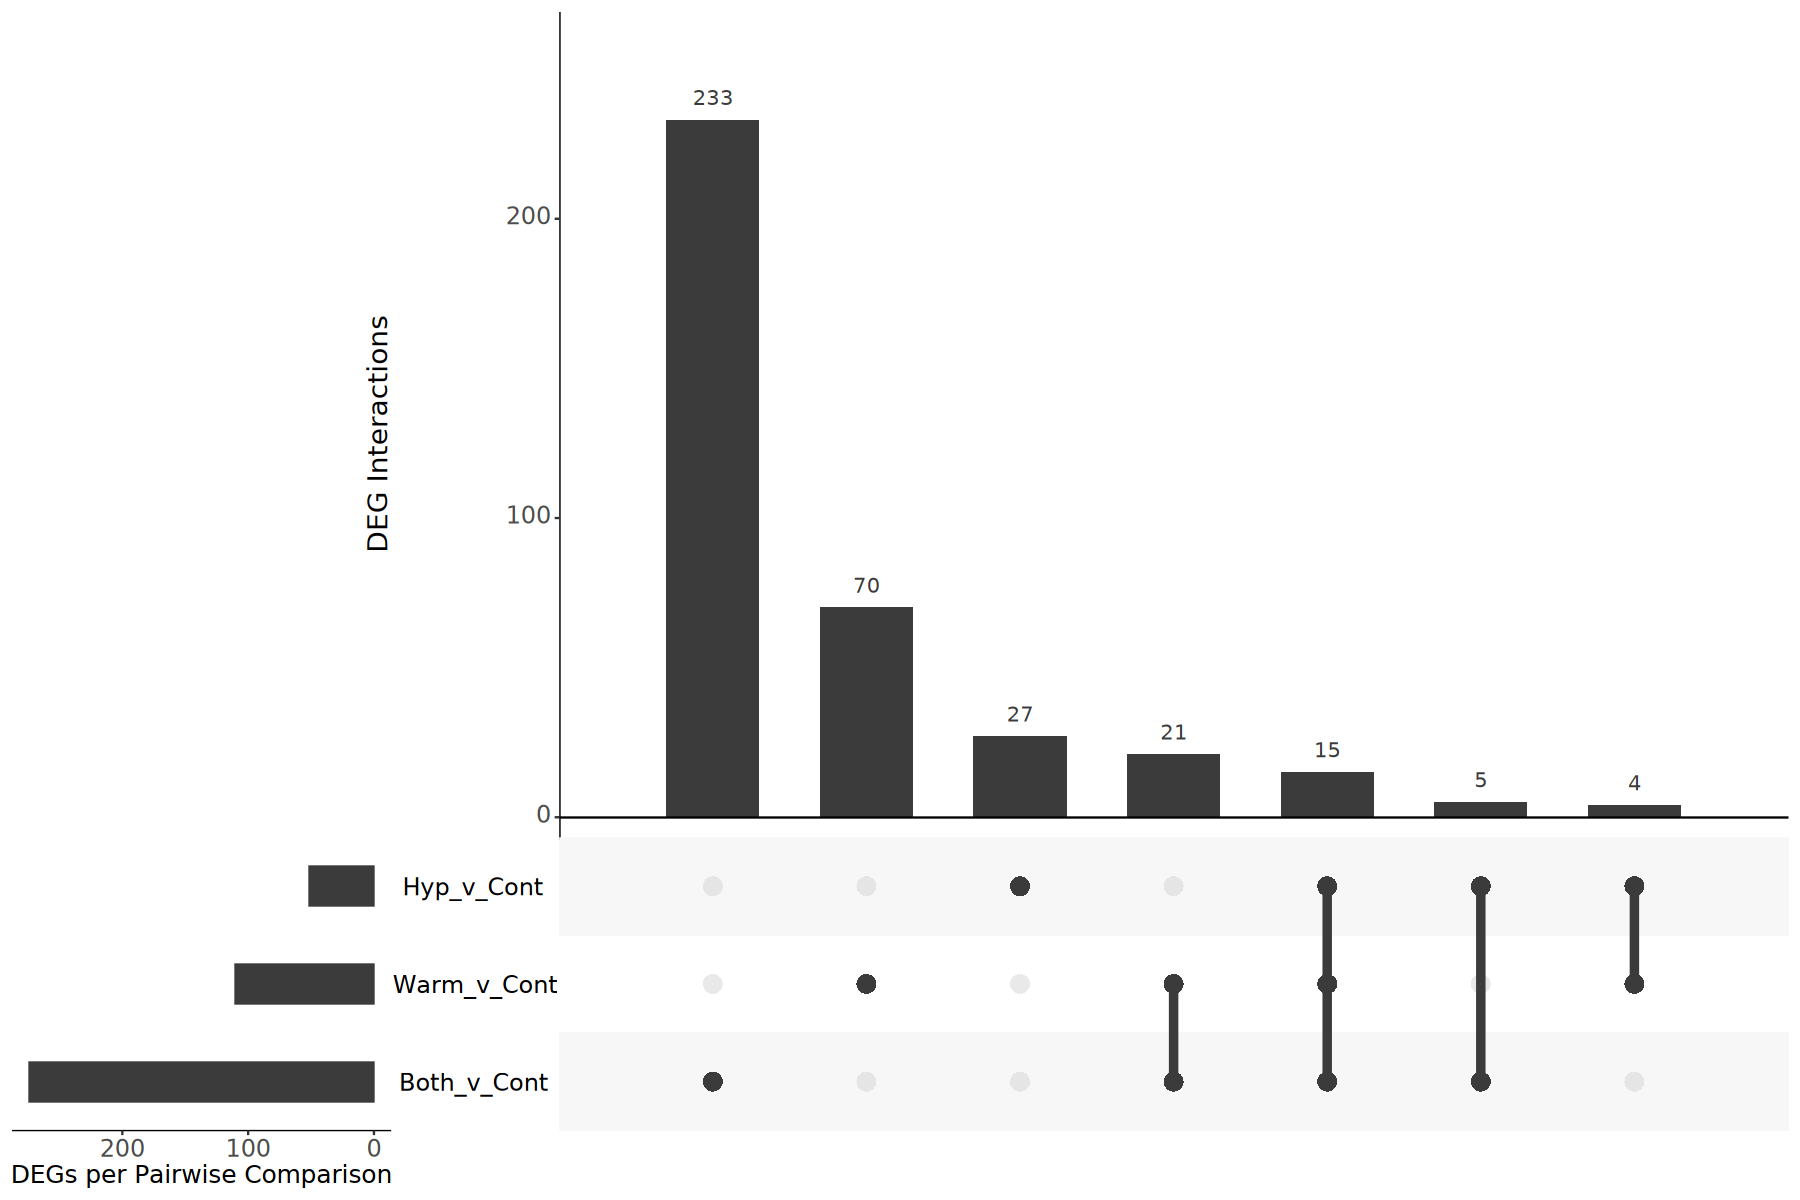

In [37]:
options(repr.plot.width=15, repr.plot.height=10)


# make list of dfs
cont_list = list(Warm_v_Cont = deg_list$w_c$X,
         Both_v_Cont = deg_list$b_c$X,
         Hyp_v_Cont = deg_list$h_c$X)

cont_upset <- upset(fromList(cont_list), nsets = 6,, order.by='freq', point.size = 5, line.size = 2, 
    mainbar.y.label = "DEG Interactions", sets.x.label = "DEGs per Pairwise Comparison", 
    text.scale = c(2, 2, 1.75, 2, 2, 2))

cont_upset

In [38]:
pdf('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/plots/vs.cont_upset.pdf', width=15, height=10)
cont_upset
dev.off()

png 
  2

... and **other comparisons outside those with control**

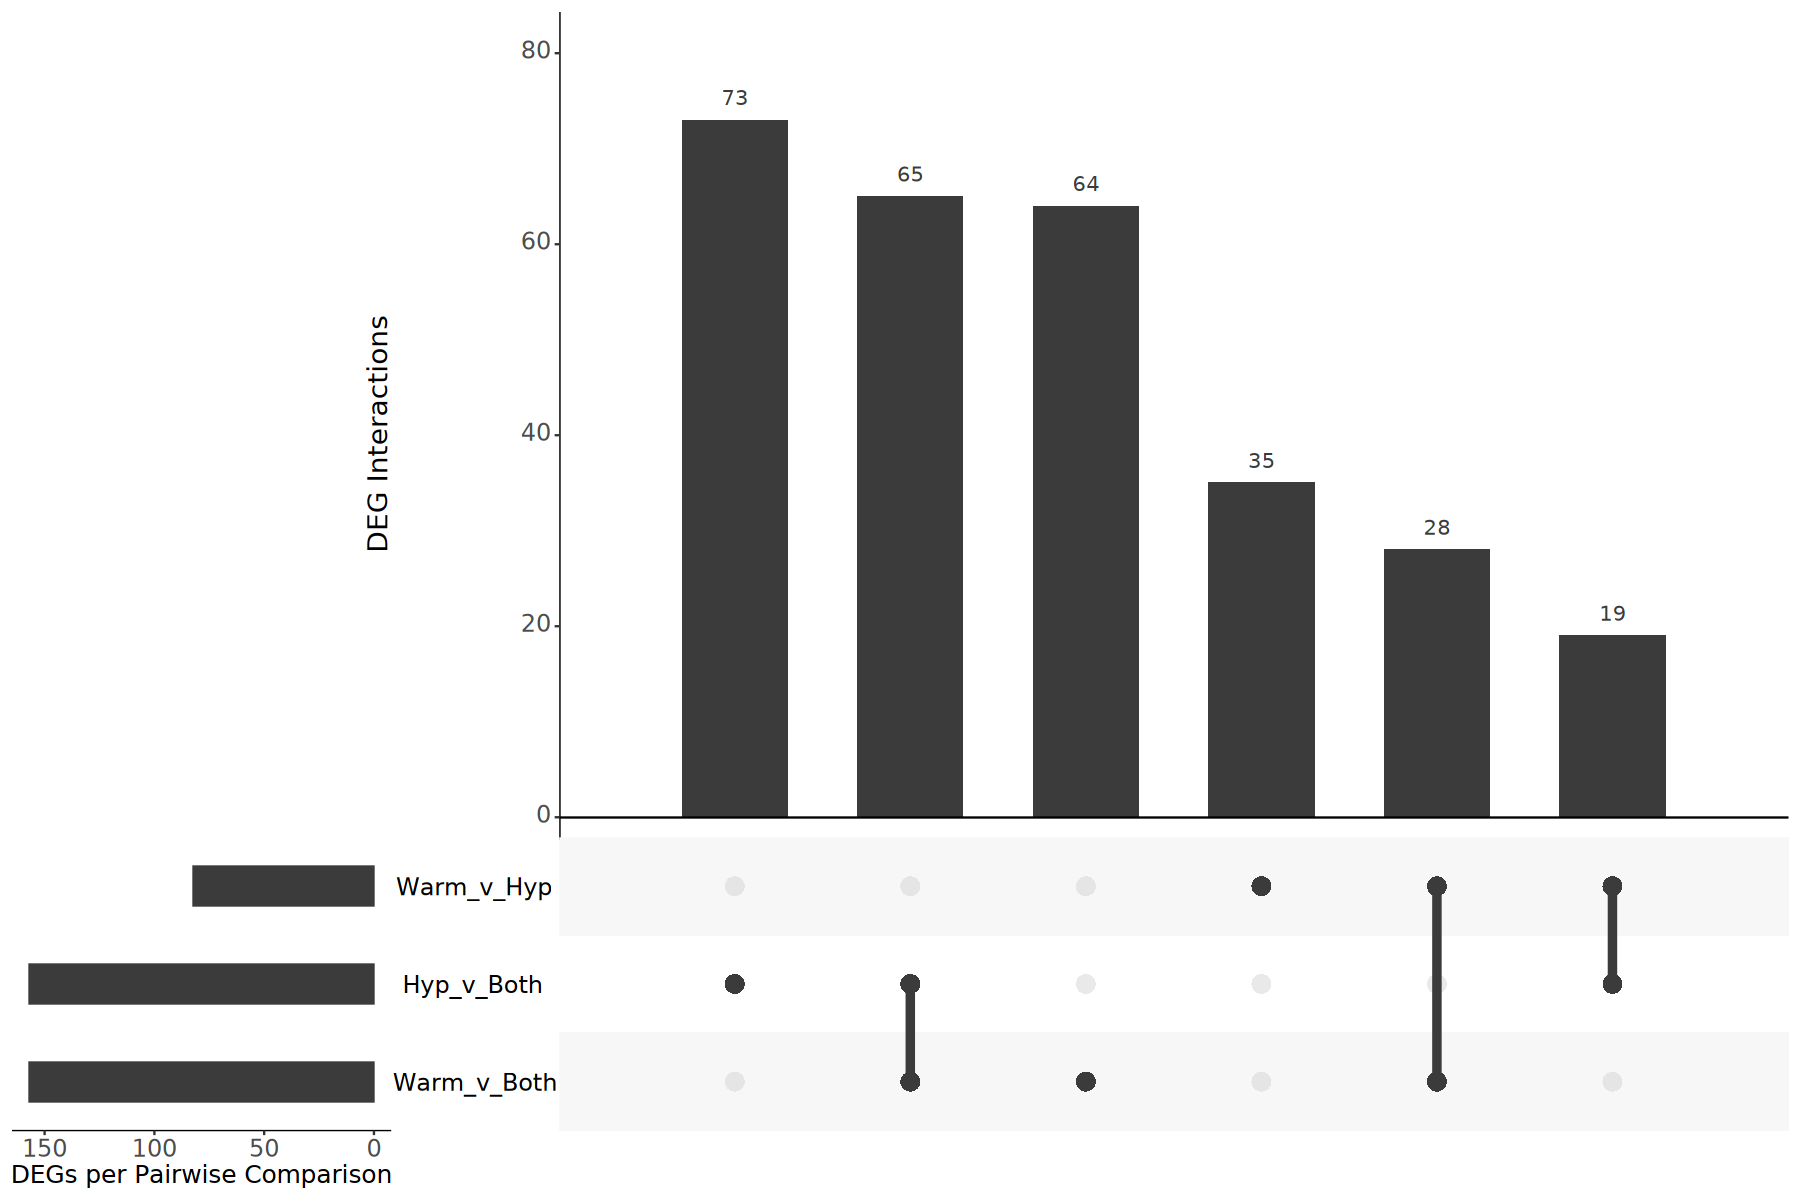

In [40]:
options(repr.plot.width=15, repr.plot.height=10)

other_list = list(Hyp_v_Both = deg_list$h_b$X,
                  Warm_v_Both = deg_list$w_b$X,
                  Warm_v_Hyp = deg_list$h_w$X)

other_upset <- upset(fromList(other_list), nsets = 6,, order.by='freq', point.size = 5, line.size = 2, 
    mainbar.y.label = "DEG Interactions", sets.x.label = "DEGs per Pairwise Comparison", 
    text.scale = c(2, 2, 1.75, 2, 2, 2))

other_upset

In [44]:
pdf('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_2024/CE24_RNA-seq/analysis/diff_expression/phase1_v_phase1/plots/vs.other_upset.pdf', width=15, height=10)
other_upset
dev.off()

png 
  2